In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df=pd.read_csv("VNL2023.csv")
df

Player    Country  Age  Attack  Block  Serve   Set  \
0                  Ichikawa Yuki      Japan   28   15.80   1.13   1.40  0.07   
1                    Romano Yuri      Italy   26   12.33   1.07   1.47  0.00   
2               Abdel-Aziz Nimir  Nederland   31   15.33   0.67   2.08  0.00   
3            Herrera Jaime Jesus       Cuba   28   15.00   0.92   1.75  0.00   
4                  Takahashi Ran      Japan   22   11.53   0.67   1.00  0.07   
..                           ...        ...  ...     ...    ...    ...   ...   
126               Graven Leonard    Germany   19    0.00   0.00   0.00  0.00   
127                 Balaso Fabio      Italy   28    0.00   0.00   0.00  0.00   
128      Nacsimento Maique Reis      Brazil   26    0.00   0.00   0.00  0.00   
129  Garcia Alvarez Yonder Roman       Cuba   30    0.00   0.00   0.00  0.00   
130              Salparov Teodor   Bulgaria   41    0.00   0.00   0.00  0.00   

       Dig  Receive Position  
0     4.80     5.60       OH  
1     3.87     0.00       OP  
2     3.17     0.25       OP  
3     3.33     0.17       OP  
4     6.40     5.07       OH  
..     ...      ...      ...  
126   5.92     1.92        L  
127  10.00     5.00        L  
128   5.08     2.46        L  
129   4.25     3.25        L  
130   5.00     3.75        L  

[131 rows x 10 columns]

In [9]:
df.head(10)

Player    Country  Age  Attack  Block  Serve   Set   Dig  \
0            Ichikawa Yuki      Japan   28   15.80   1.13   1.40  0.07  4.80   
1              Romano Yuri      Italy   26   12.33   1.07   1.47  0.00  3.87   
2         Abdel-Aziz Nimir  Nederland   31   15.33   0.67   2.08  0.00  3.17   
3      Herrera Jaime Jesus       Cuba   28   15.00   0.92   1.75  0.00  3.33   
4            Takahashi Ran      Japan   22   11.53   0.67   1.00  0.07  6.40   
5           Luburic Drazen     Serbia   30   14.33   0.58   1.08  0.00  4.25   
6              Urnaut Tine   Slovenia   35   12.62   0.31   1.38  0.00  5.85   
7            Zhang Jingyin      China   24   13.50   1.83   1.42  0.00  3.42   
8               Souza Alen     Brazil   29   12.46   0.62   0.54  0.00  4.15   
9  Souza Ricardo Lucarelli     Brazil   31   11.85   0.92   1.46  0.15  5.38   

   Receive Position  
0     5.60       OH  
1     0.00       OP  
2     0.25       OP  
3     0.17       OP  
4     5.07       OH  
5     0.00       OP  
6     5.00       OH  
7     4.00       OH  
8     0.00       OP  
9     3.62       OH

In [10]:
df.describe()

Age      Attack       Block       Serve         Set         Dig  \
count  131.000000  131.000000  131.000000  131.000000  131.000000  131.000000   
mean    27.809160    5.642672    0.845573    0.535802    2.192595    3.428397   
std      4.186268    4.256229    0.700896    0.454346    6.031587    2.077823   
min     19.000000    0.000000    0.000000    0.000000    0.000000    0.530000   
25%     25.000000    2.800000    0.370000    0.240000    0.000000    1.920000   
50%     27.000000    5.170000    0.690000    0.420000    0.000000    3.000000   
75%     30.000000    8.600000    1.140000    0.760000    0.000000    4.510000   
max     41.000000   15.800000    4.080000    2.080000   26.890000   11.440000   

          Receive  
count  131.000000  
mean     1.684198  
std      1.989939  
min      0.000000  
25%      0.000000  
50%      0.330000  
75%      3.385000  
max      6.690000

In [13]:
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [19]:
numeric_col=df.select_dtypes(include=["int","float"]).columns
corrlation=df[numeric_col].corr()
print(corrlation)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


<Axes: >

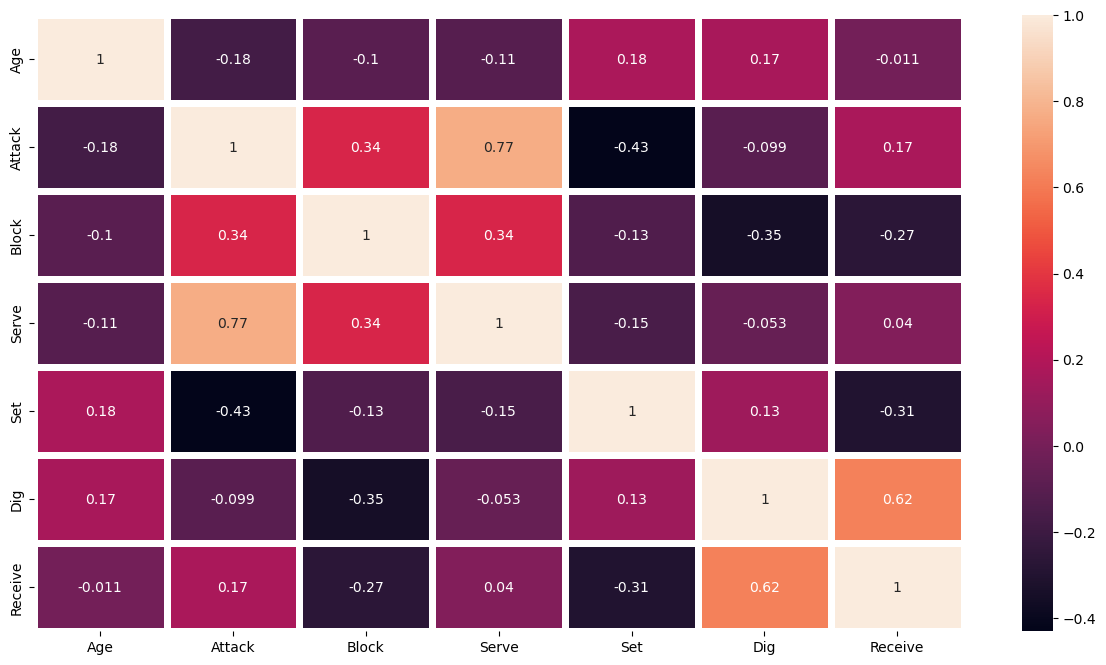

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(corrlation,annot=True,linewidth=5)

In [37]:
hello=df["Position"].value_counts()


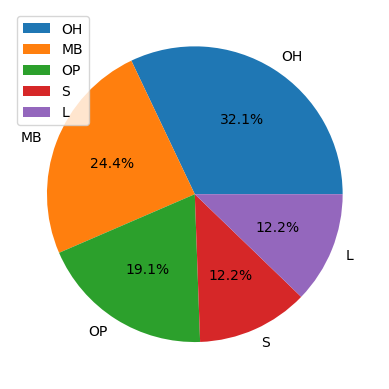

In [41]:
plt.pie(hello,labels=hello.index,autopct="%1.1f%%")
plt.legend()

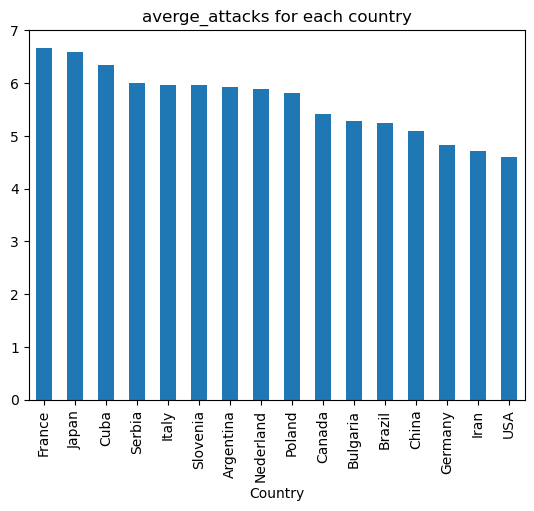

In [47]:
averge_attacks=df.groupby("Country")["Attack"].mean()
averge_attacks.sort_values(ascending=False).plot(kind="bar")
plt.title("averge_attacks for each country")
plt.show()

In [50]:
df.groupby("Country")["Serve"].mean()

Country
Argentina    0.535000
Brazil       0.432500
Bulgaria     0.350000
Canada       0.522857
China        0.447500
Cuba         0.558571
France       0.501000
Germany      0.427500
Iran         0.467778
Italy        0.755000
Japan        0.641250
Nederland    0.701429
Poland       0.582000
Serbia       0.565000
Slovenia     0.500000
USA          0.604444
Name: Serve, dtype: float64

In [81]:
df.groupby(["Country", "Position"])["Attack"].max().head(20).reset_index().sort_values(ascending=False,by="Attack")



Country Position  Attack
12   Bulgaria       OH   14.25
8      Brazil       OP   12.46
7      Brazil       OH   11.85
2   Argentina       OH   11.62
17     Canada       OH    9.75
18     Canada       OP    9.50
3   Argentina       OP    9.15
1   Argentina       MB    7.92
13   Bulgaria       OP    5.75
16     Canada       MB    4.75
11   Bulgaria       MB    4.42
6      Brazil       MB    4.31
4   Argentina        S    0.78
9      Brazil        S    0.38
19     Canada        S    0.17
14   Bulgaria        S    0.17
0   Argentina        L    0.00
5      Brazil        L    0.00
10   Bulgaria        L    0.00
15     Canada        L    0.00

In [82]:
df.groupby("Country")["Dig"].sum()

Country
Argentina    33.88
Brazil       24.61
Bulgaria     22.45
Canada       26.50
China        22.08
Cuba         20.26
France       38.59
Germany      20.92
Iran         24.25
Italy        35.89
Japan        32.38
Nederland    21.84
Poland       32.56
Serbia       30.64
Slovenia     33.85
USA          28.42
Name: Dig, dtype: float64

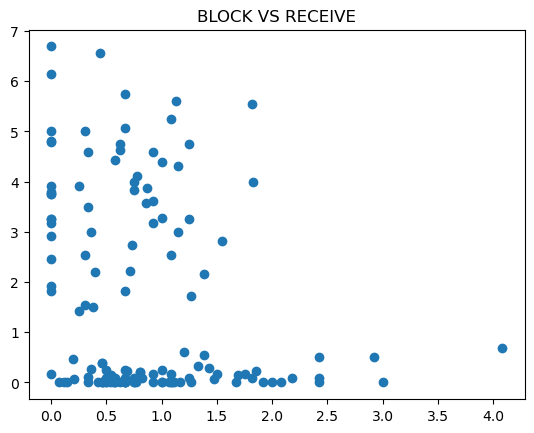

In [83]:
plt.scatter(df["Block"],df["Receive"]) 
plt.title("BLOCK VS RECEIVE")
plt.show()

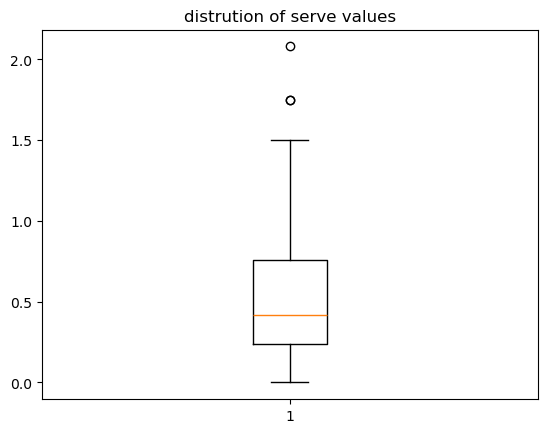

In [88]:
plt.boxplot(x=df["Serve"])
plt.title("distrution of serve values")
plt.show()


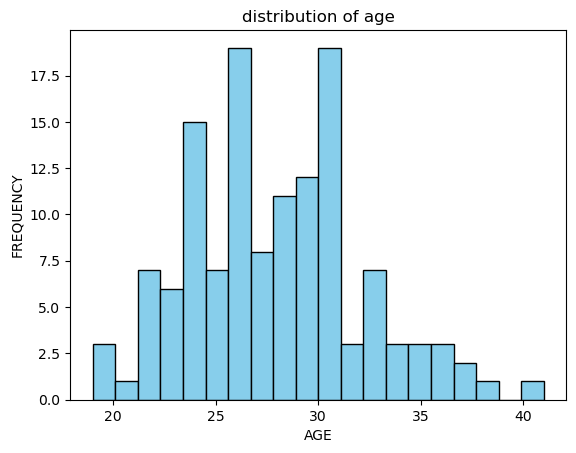

In [91]:
plt.hist(df["Age"],edgecolor="black",color="skyblue",bins=20)
plt.title("distribution of age")
plt.xlabel("AGE")
plt.ylabel("FREQUENCY")
plt.show()

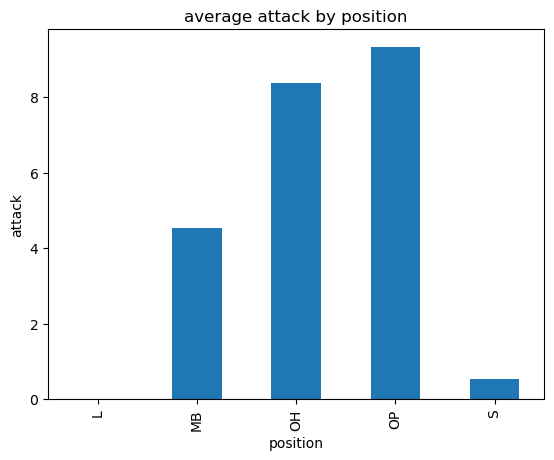

In [94]:
average_position=df.groupby("Position")["Attack"].mean()
average_position.plot(kind="bar")
plt.title("average attack by position")
plt.xlabel("position")
plt.ylabel("attack")
plt.show()

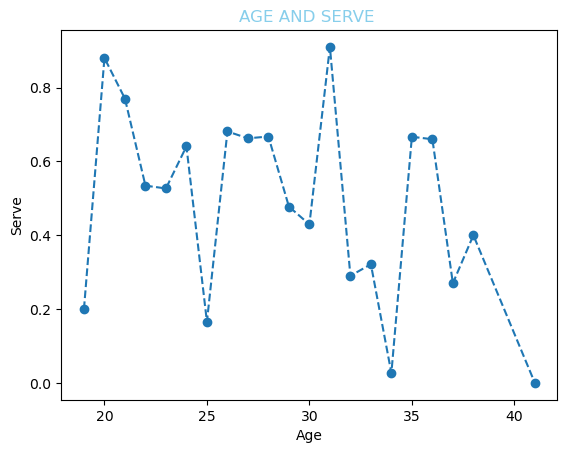

In [104]:
serve_position=df.groupby("Age")["Serve"].mean()
serve_position.plot(kind="line",marker="o",linestyle="--")
plt.title("AGE AND SERVE ",color="skyblue")
plt.ylabel("Serve")
plt.show()


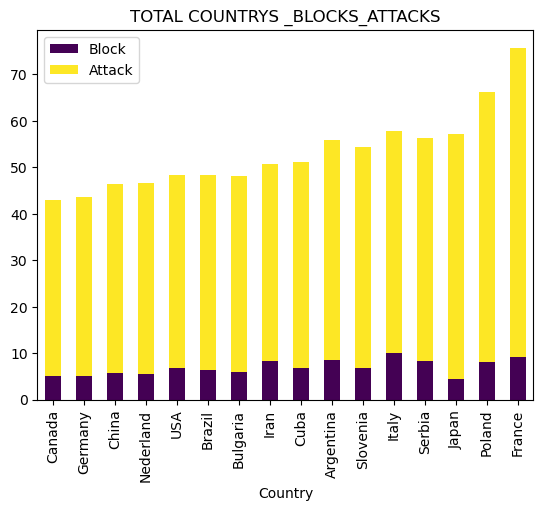

In [113]:
bolck_attacks_for_countrys=df.groupby("Country")[["Block","Attack"]].sum().sort_values(ascending=True,by="Attack")
bolck_attacks_for_countrys.plot(kind="bar",stacked=True,colormap="viridis")
plt.title("TOTAL COUNTRYS _BLOCKS_ATTACKS")
plt.show()